In [1]:
import os
os.chdir('..')

In [2]:
import articles as art
from evaluation import Evaluator
from model1 import Model1
from model2 import Model2
from model3 import Model3
import numpy as np
import pickle

In [3]:
classifier_file = open('pickles/svm_classifier_1', 'rb')
classifier = pickle.load(classifier_file)
classifier_file.close()
vectorizer_file = open('pickles/vectorizer_1','rb')
vectorizer = pickle.load(vectorizer_file)
vectorizer_file.close()

In [4]:
articles = art.load_articles()

In [5]:
housing_index = 'data/real_estate_data/direct/england.csv'
securitized_data = 'data/real_estate_data/securitized/FTSE EPRA_NAREIT UK Historical Data.csv'

§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§
POSITIVE SENTIMENT


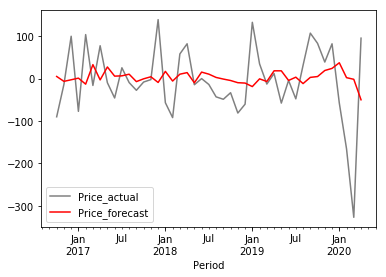

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 24, May, 2020
Time:                     15:22:15
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    2.74514
Nobs:                     167.000    HQIC:                   2.54547
Log likelihood:          -657.083    FPE:                    11.1259
AIC:                      2.40907    Det(Omega_mle):         10.0171
--------------------------------------------------------------------
Results for equation Price
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      2.560392         7.217986            0.355           0.723
L1.Price                   0.119576         0.079916            1.496           0.135
L1.Positive Scores       -36.548971     

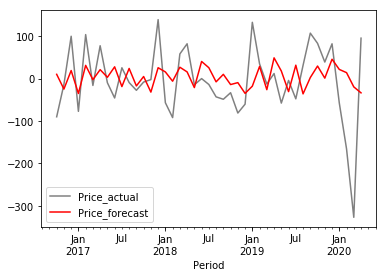

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 24, May, 2020
Time:                     15:22:16
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    1.99177
Nobs:                     168.000    HQIC:                   1.83709
Log likelihood:          -608.204    FPE:                    5.64931
AIC:                      1.73144    Det(Omega_mle):         5.20641
--------------------------------------------------------------------
Results for equation Price
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      3.208513         6.990153            0.459           0.646
L1.Price                   0.163654         0.077095            2.123           0.034
L1.Negative Scores      -346.277906     

In [22]:
model = Model2(articles, classifier, vectorizer)
ev = Evaluator(model, articles, securitized_data, market_data_column = "Price", date_format="%b %y")

In [27]:
from latex_tables import table_printer_2
p = table_printer_2(ev.negative_var.fit, ev.positive_var.fit, "Price", "FTSE EPRA Nareit", "Positivity indicator", "Negativity indicator")

In [28]:
p.print_table()

Constant
& \num{2.560e+00} & \num{7.218e+00} & $0.723$  & \num{-1.169e+01} & \num{1.681e+01}
& \num{3.209e+00} & \num{6.990e+00} & $0.646$  & \num{-1.059e+01} & \num{1.701e+01}
\\
FTSE EPRA Nareit \textit{(-1)}
& \num{1.196e-01} & \num{7.992e-02} & $0.135$  & \num{-3.821e-02} & \num{2.774e-01}
& \num{1.637e-01} & \num{7.710e-02} & $0.034$ \tnote{*} & \num{1.145e-02} & \num{3.159e-01}
\\
FTSE EPRA Nareit \textit{(-2)}
& \num{3.680e-02} & \num{7.904e-02} & $0.641$  & \num{-1.193e-01} & \num{1.929e-01}
& \num{-5.516e-03} & \num{7.775e-02} & $0.943$  & \num{-1.590e-01} & \num{1.480e-01}
\\
FTSE EPRA Nareit \textit{(-3)}
& \num{1.510e-01} & \num{7.930e-02} & $0.057$  & \num{-5.562e-03} & \num{3.076e-01}
& \num{1.749e-01} & \num{7.678e-02} & $0.023$ \tnote{*} & \num{2.330e-02} & \num{3.265e-01}
\\
FTSE EPRA Nareit \textit{(-4)}
& \num{7.379e-02} & \num{8.102e-02} & $0.362$  & \num{-8.617e-02} & \num{2.338e-01}
& & & & &
\\
Positivity indicator \textit{(-1)}
& \num{-3.655e+01} & \num{2.103e+0